# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r"C:\Users\hassa\OneDrive\Desktop\customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [5]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [6]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [7]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [8]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

C:\Users\hassa\AppData\Local\Temp\ipykernel_21252\993609605.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='booking_complete', data=df, palette='viridis')


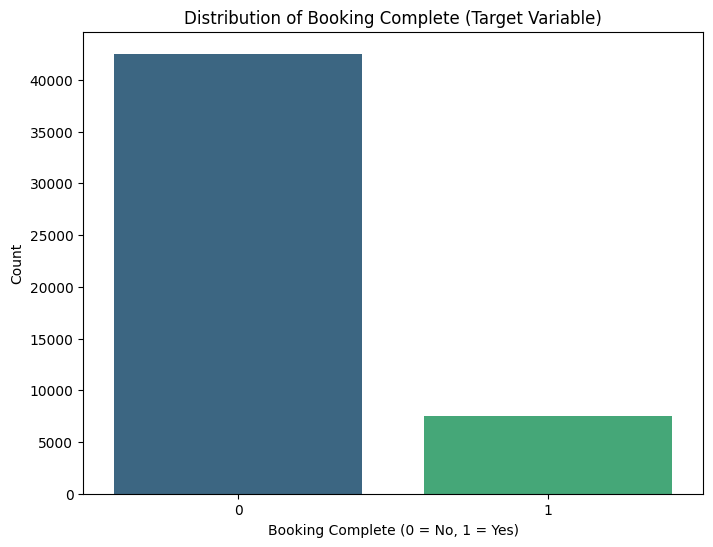

In [9]:
# Let's explore the dataset by generating some visualizations.

import seaborn as sns
import matplotlib.pyplot as plt

# Check the distribution of the target variable (booking_complete)
plt.figure(figsize=(8, 6))
sns.countplot(x='booking_complete', data=df, palette='viridis')
plt.title('Distribution of Booking Complete (Target Variable)')
plt.xlabel('Booking Complete (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


C:\Users\hassa\AppData\Local\Temp\ipykernel_21252\3342708268.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='booking_complete', y='purchase_lead', data=df, palette='coolwarm')


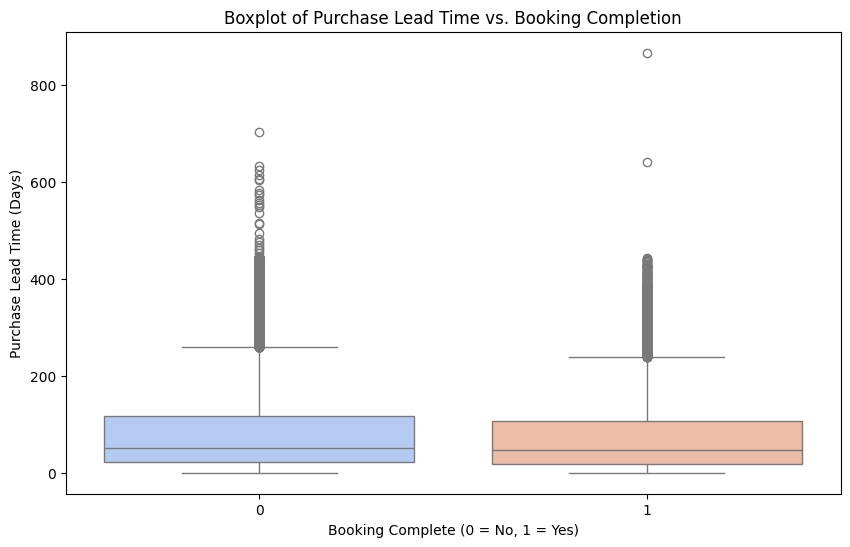

In [10]:

# Explore the relationship between purchase lead time and whether the booking was completed
plt.figure(figsize=(10, 6))
sns.boxplot(x='booking_complete', y='purchase_lead', data=df, palette='coolwarm')
plt.title('Boxplot of Purchase Lead Time vs. Booking Completion')
plt.xlabel('Booking Complete (0 = No, 1 = Yes)')
plt.ylabel('Purchase Lead Time (Days)')
plt.show()

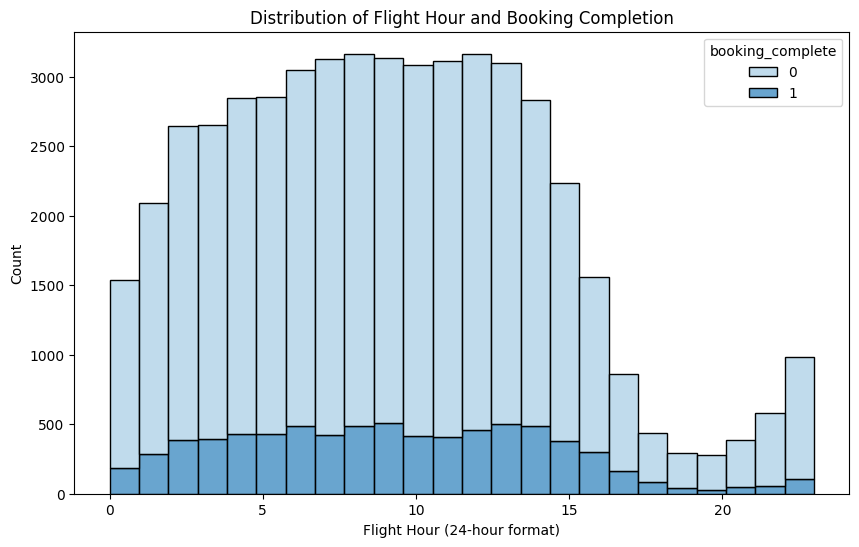

In [11]:
# Visualize the distribution of flight hours and how it relates to booking completion
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='flight_hour', hue='booking_complete', multiple='stack', bins=24, palette='Blues')
plt.title('Distribution of Flight Hour and Booking Completion')
plt.xlabel('Flight Hour (24-hour format)')
plt.ylabel('Count')
plt.show()

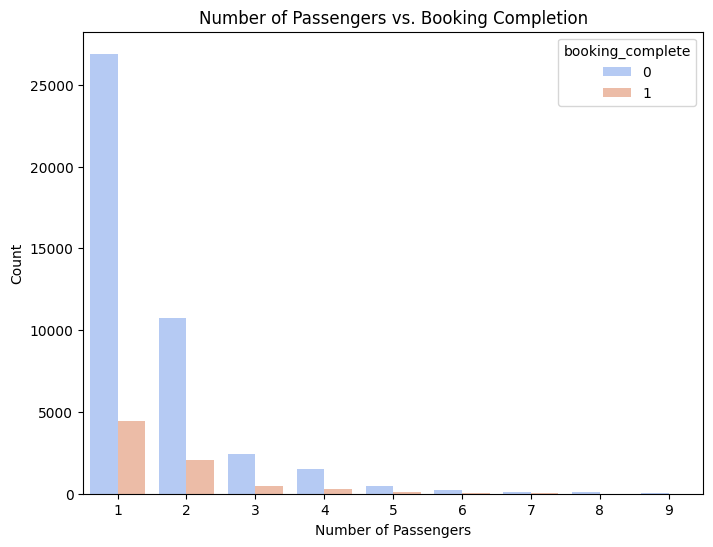

In [12]:
# Visualize the number of passengers against booking completion
plt.figure(figsize=(8, 6))
sns.countplot(x='num_passengers', hue='booking_complete', data=df, palette='coolwarm')
plt.title('Number of Passengers vs. Booking Completion')
plt.xlabel('Number of Passengers')
plt.ylabel('Count')
plt.show()


Here are some key insights from the exploratory visualizations:

Distribution of Booking Completion: Most of the bookings in the dataset are not completed (0), indicating a class imbalance.
Purchase Lead Time: Customers who completed their bookings tend to have slightly shorter lead times, although there is considerable overlap.
Flight Hour: The distribution of flight hours shows a fairly even spread across different times, with some notable differences between completed and uncompleted bookings at specific hours.
Number of Passengers: Bookings with one or two passengers dominate, and there are slightly more completed bookings for single-passenger trips.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Checking for missing values in the dataset
missing_values = df.isnull().sum()

# Step 1: Handle missing values (if any)
# For now, we will simply drop rows with missing values if they exist.
customer_booking_df = df.dropna()

# Step 2: Splitting the dataset into features (X) and target (y)
X = customer_booking_df.drop(columns=['booking_complete'])  # Features
y = customer_booking_df['booking_complete']  # Target variable (booking completion)

# Step 3: Handling categorical variables using One-Hot Encoding
categorical_features = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']
numeric_features = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']

# Step 4: Preprocessing pipeline for both numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Scale numeric features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # One-hot encode categorical features
    ])

# Step 5: Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check how the preprocessing pipeline transforms the data
X_train_transformed = preprocessor.fit_transform(X_train)

# Display a sample of the transformed data
X_train_transformed[:5]

<5x892 sparse matrix of type '<class 'numpy.float64'>'
	with 50 stored elements in Compressed Sparse Row format>

Here's a summary of what was done:

Missing Values: We dropped rows with missing values.
Categorical Encoding: We applied One-Hot Encoding to categorical features like sales_channel, trip_type, and route, transforming them into binary indicators.
Scaling: Numerical features like purchase_lead and flight_duration were scaled using StandardScaler.
The transformed data is now ready for model training. We can proceed with building a Random Forest model and evaluating its performance.

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np



Accuracy: 0.8506

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      8520
           1       0.49      0.16      0.24      1480

    accuracy                           0.85     10000
   macro avg       0.68      0.56      0.58     10000
weighted avg       0.81      0.85      0.82     10000


Confusion Matrix:
[[8272  248]
 [1246  234]]


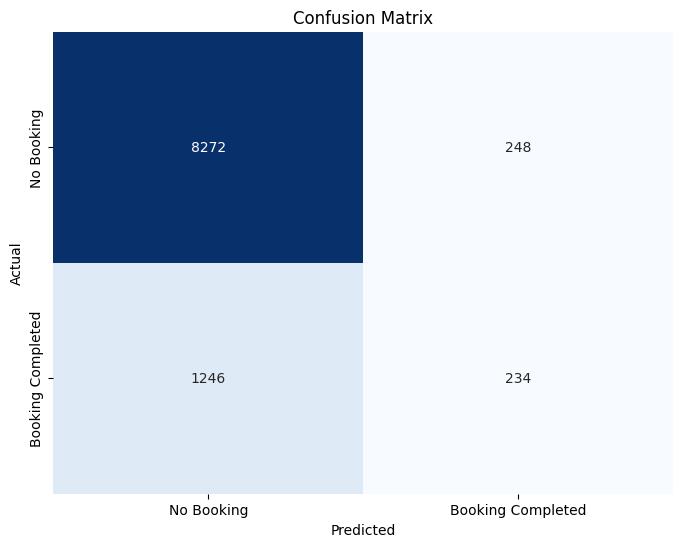

In [15]:
# Step 6: Build a Random Forest model
# We'll initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Step 7: Create a pipeline that applies the preprocessor and then trains the model
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', rf_model)])

# Step 8: Train the model using the training data
model_pipeline.fit(X_train, y_train)

# Step 9: Make predictions on the test data
y_pred = model_pipeline.predict(X_test)

# Step 10: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(classification_rep)
print("\nConfusion Matrix:")
print(conf_matrix)


# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["No Booking", "Booking Completed"], yticklabels=["No Booking", "Booking Completed"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



Key Metrics:
Accuracy: 85.06%

This means the model correctly predicted the outcome 85% of the time. However, accuracy alone doesn't tell the full story due to the class imbalance.
Precision and Recall:

For Class 0 (No Booking):
Precision: 0.87, meaning that 87% of the predicted "No Booking" results were correct.
Recall: 0.97, meaning that 97% of all actual "No Booking" instances were correctly identified.
F1-Score: 0.92, which balances precision and recall for this class.
For Class 1 (Booking Completed):
Precision: 0.49, meaning that 49% of the predicted "Booking Completed" results were correct.
Recall: 0.16, meaning that only 16% of actual "Booking Completed" instances were identified by the model.
F1-Score: 0.24, which shows that the model struggles to correctly identify completed bookings.
Confusion Matrix:

Class 0 (No Booking): Out of 8,520 true "No Booking" instances, 8,272 were correctly predicted, and only 248 were misclassified as "Booking Completed."
Class 1 (Booking Completed): Out of 1,480 true "Booking Completed" instances, only 234 were correctly predicted, while 1,246 were incorrectly predicted as "No Booking."
Key Insights:
The model performs well for predicting "No Booking" cases but struggles significantly with predicting "Booking Completed" cases, which is common with imbalanced datasets.
Precision and recall for class 1 (Booking Completed) are low, indicating that the model finds it difficult to correctly identify customers who complete their bookings.
The confusion matrix shows a high number of false negatives (1,246), where the model predicted "No Booking" when in fact a booking was completed.

In [16]:
# Extract the RandomForest model from the pipeline after training
rf_model_trained = model_pipeline.named_steps['classifier']

# Get the feature names after transformation (from both categorical and numerical features)
encoded_features = list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
final_feature_names = numeric_features + encoded_features

# Extract feature importances from the Random Forest model
feature_importances = rf_model_trained.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': final_feature_names,
    'Importance': feature_importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print(feature_importance_df.head(10))


                      Feature  Importance
1               purchase_lead    0.184624
3                 flight_hour    0.146689
2              length_of_stay    0.128159
0              num_passengers    0.051519
4             flight_duration    0.033415
842   booking_origin_Malaysia    0.028275
798  booking_origin_Australia    0.018713
10               flight_day_1    0.015487
12               flight_day_3    0.015119
11               flight_day_2    0.014837


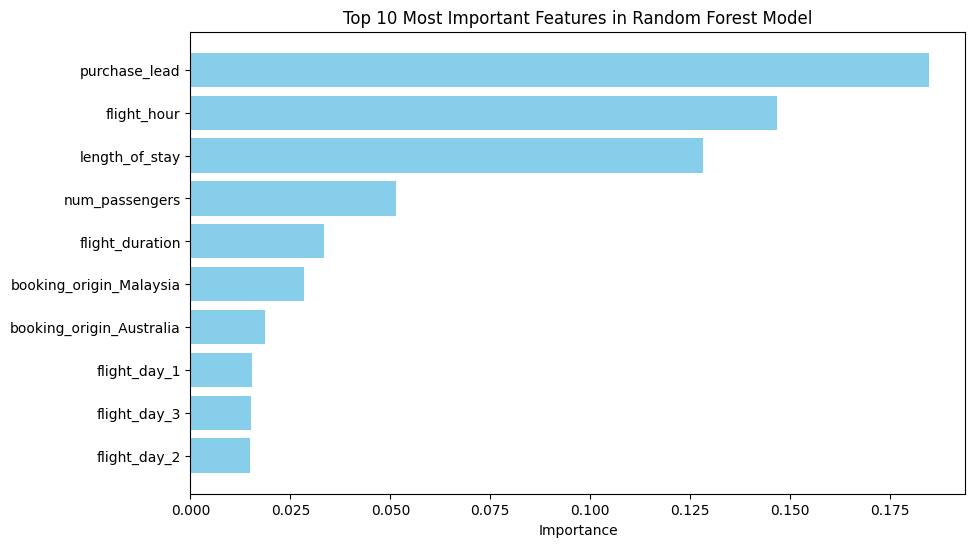

In [17]:
import matplotlib.pyplot as plt

# Plot the top 10 most important features
top_10_features = feature_importance_df.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 Most Important Features in Random Forest Model')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important at the top
plt.show()